# Drifter Chain ADCP Processing

In [1]:
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import gsw
import gvpy as gv
import velosearaptor

%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
data_path = Path("/Users/gunnar/Projects/nesma/drifter/data/drifter_chain_2024_05")

## 1-Day Test

In [3]:
ncstr_1_day_test = "drifter_tchain_2024_05_13_adcp_3160"
raw_file = data_path.joinpath("adcp/raw/03160000.000")

In [4]:
raw = velosearaptor.io.read_raw_rdi(raw_file)

In [5]:
raw_out = data_path.joinpath(f"adcp/proc/{ncstr_1_day_test}_raw.nc")
raw.to_netcdf(raw_out, encoding={
    "time": {"units": "seconds since 1970-01-01", "dtype": "float"},
    })

Plot raw data

saving to /Users/gunnar/Projects/nesma/drifter/data/drifter_chain_2024_05/adcp/fig/


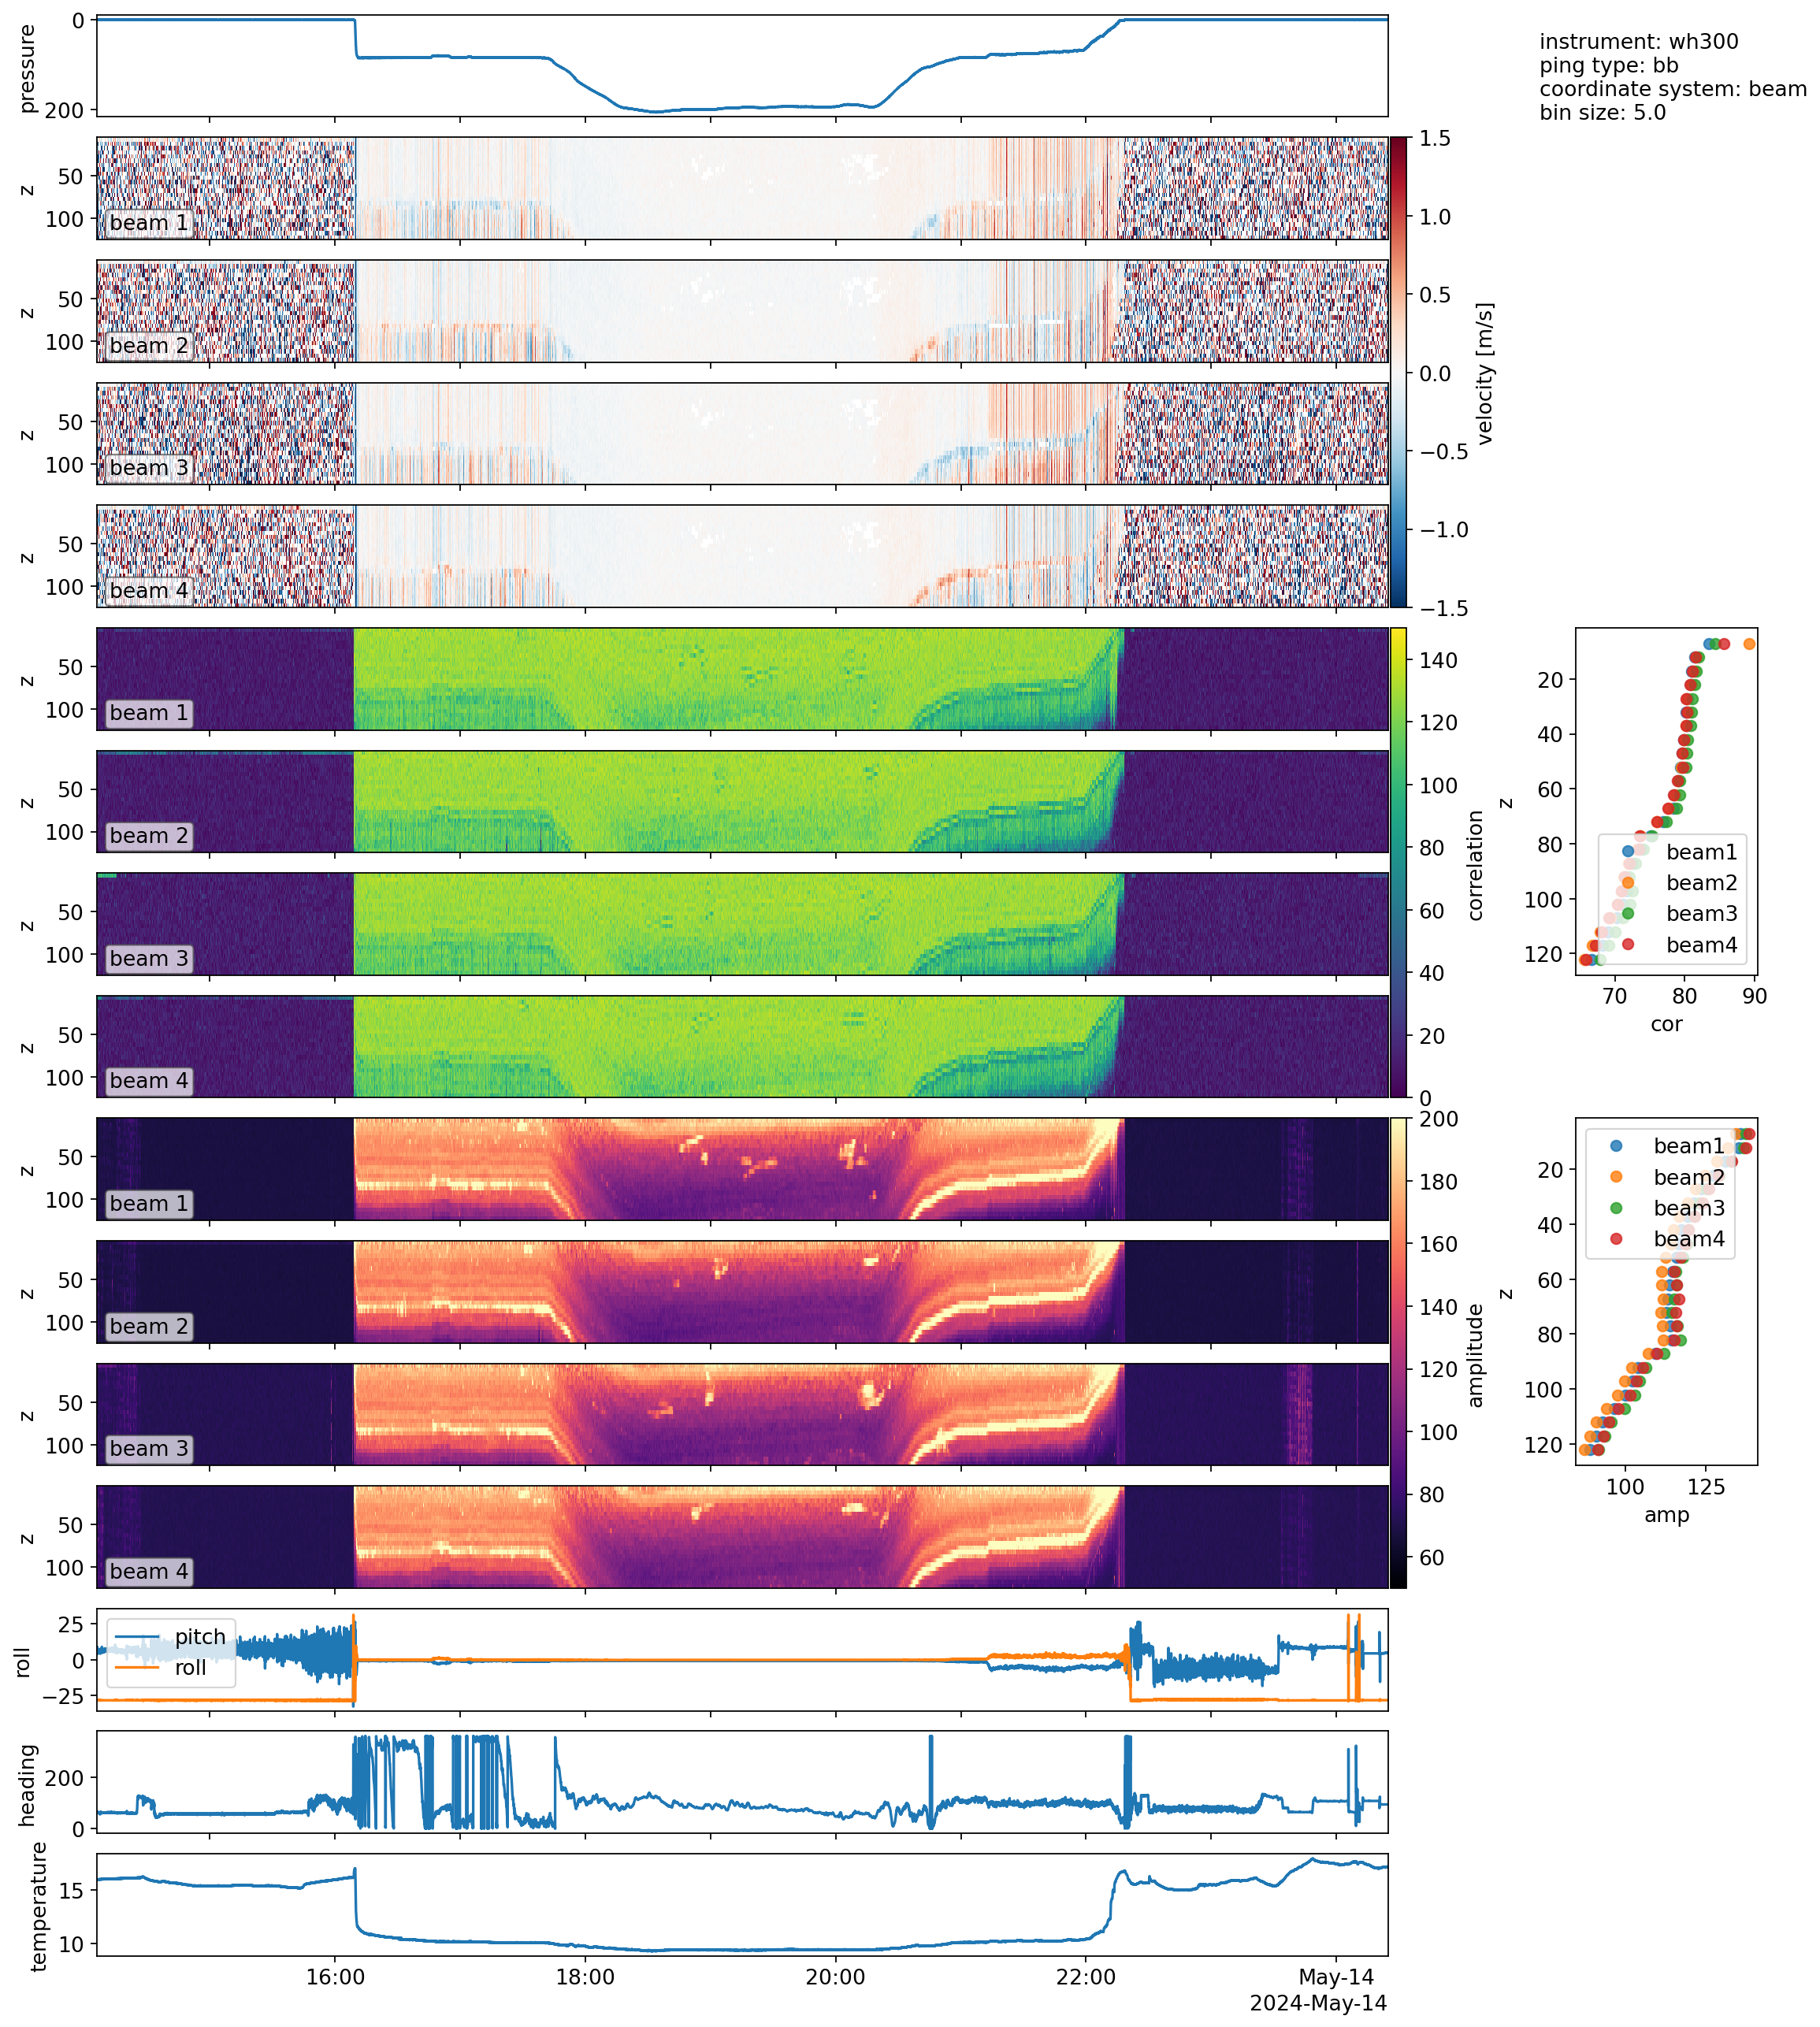

In [6]:
velosearaptor.adcp.plot_raw_adcp(raw)
fig_out = data_path.joinpath(f"adcp/fig/{ncstr_1_day_test}_raw")
gv.plot.png(fig_out)

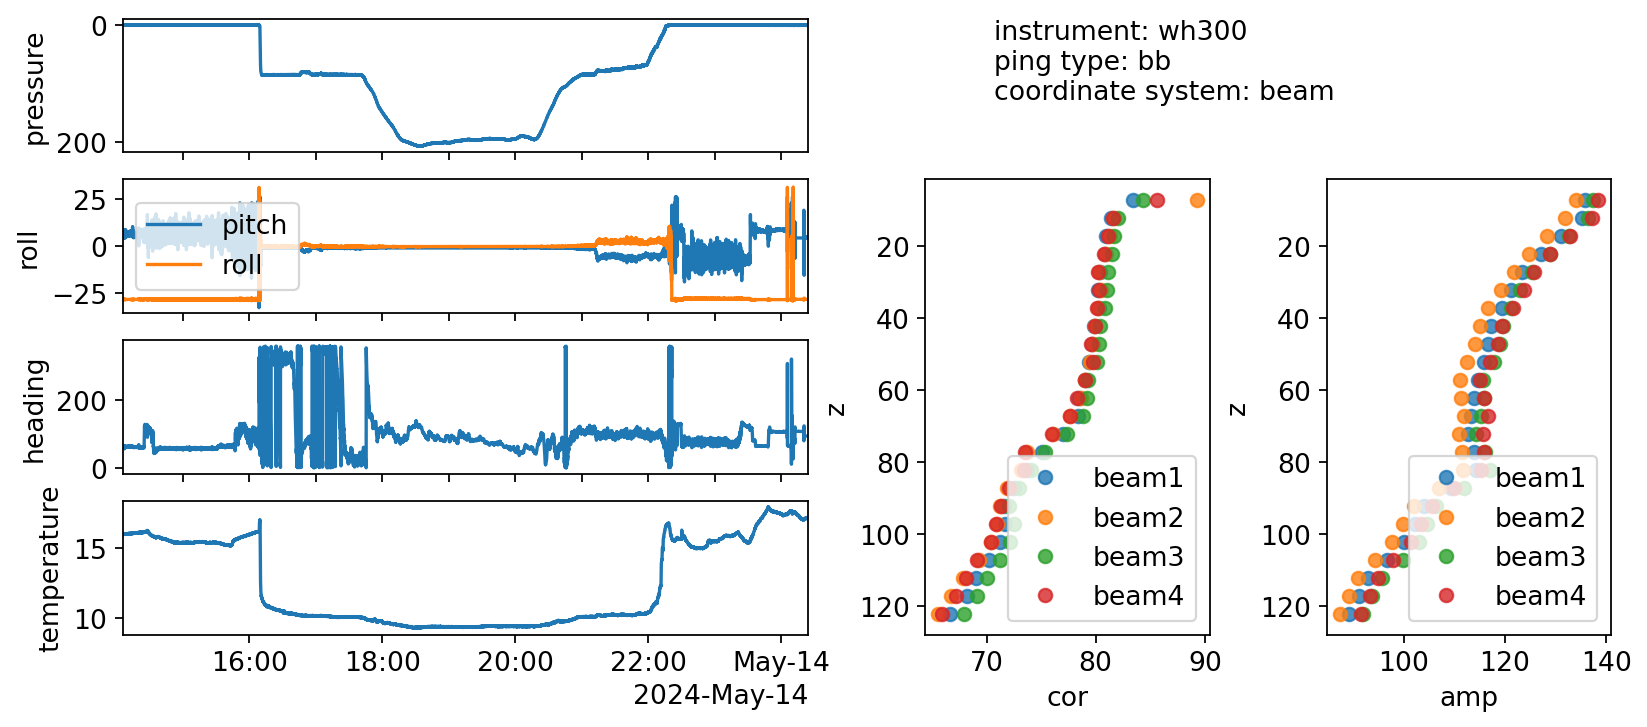

In [7]:
velosearaptor.adcp.plot_raw_adcp_auxillary(raw)

Process raw-data

In [8]:
meta_data = dict(lon=-130, lat=30, mooring=ncstr_1_day_test, sn=3160)
tgridparams = dict(dt_hours=3/60)
a = velosearaptor.madcp.ProcessADCP(raw_file, meta_data=meta_data, tgridparams=tgridparams)

No time drift parameters provided, not applying any clock correction.
No depth gridding parameters provided, using default values.
No edit parameters provided, using default values.


no burst average


Reading raw data...


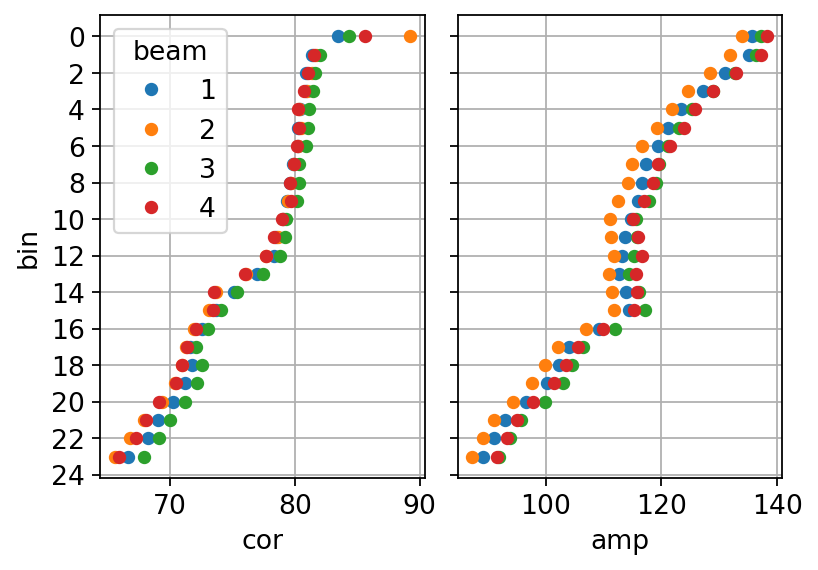

In [9]:
a.plot_echo_stats()

In [10]:
a.average_ensembles()

100%|█████████████████████████████████████████████████████████████████████████████| 62/62 [00:00<00:00, 93.17it/s]


Save to netcdf

In [11]:
proc_out = data_path.joinpath(f"adcp/proc/{ncstr_1_day_test}.nc")
a.ds.to_netcdf(proc_out, encoding={
    "time": {"units": "seconds since 1970-01-01", "dtype": "float"},
    })

A few plots

<Axes: ylabel='depth [m]'>

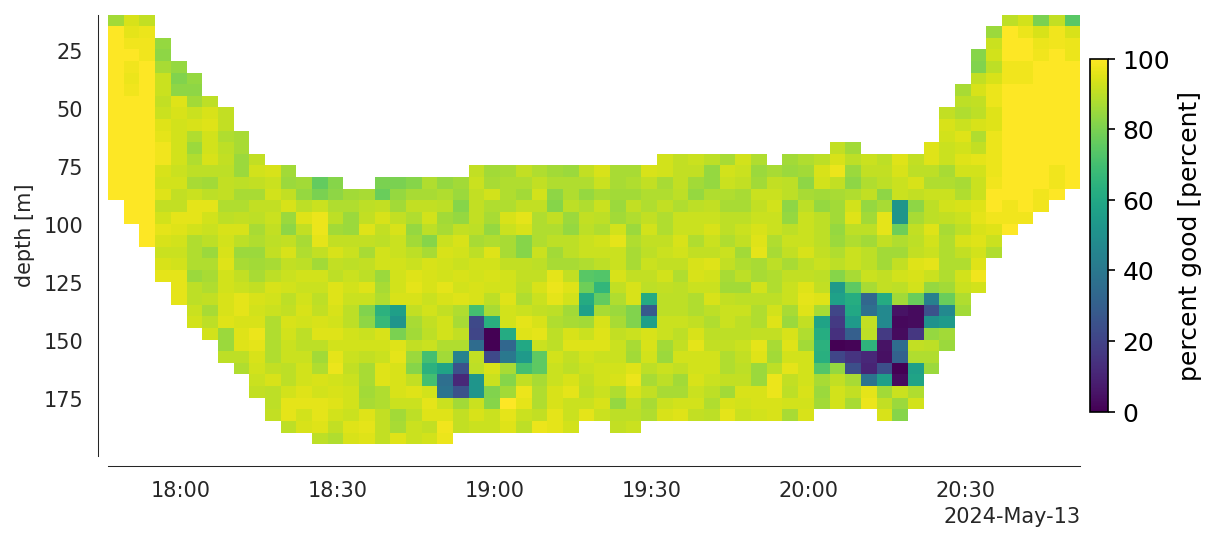

In [12]:
a.ds.pg.gv.plot()

<Axes: ylabel='depth [m]'>

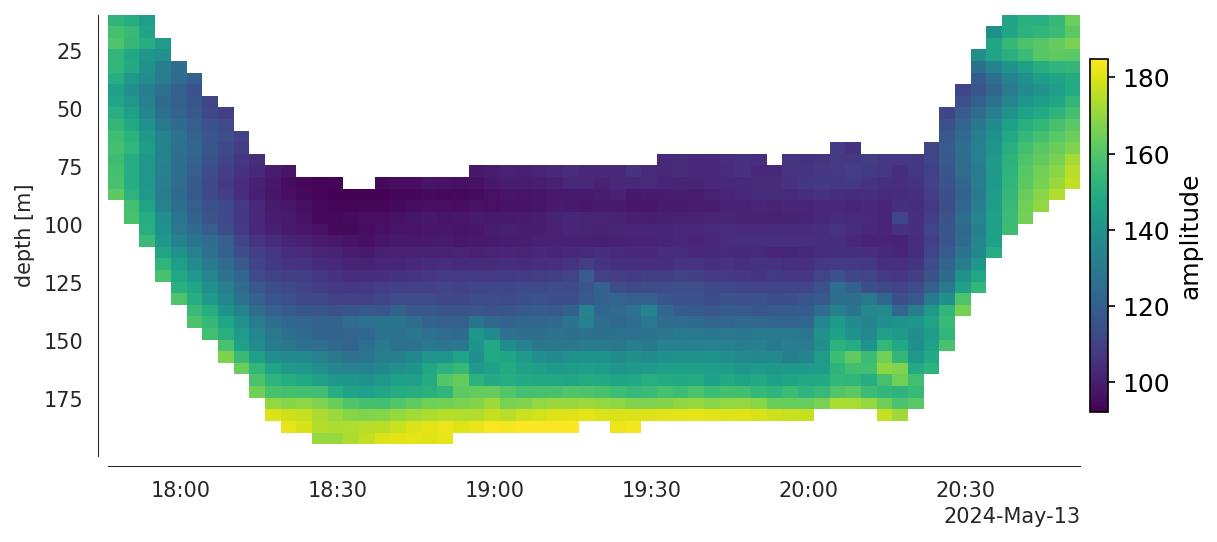

In [13]:
a.ds.amp.gv.plot()

saving to /Users/gunnar/Projects/nesma/drifter/data/drifter_chain_2024_05/adcp/fig/


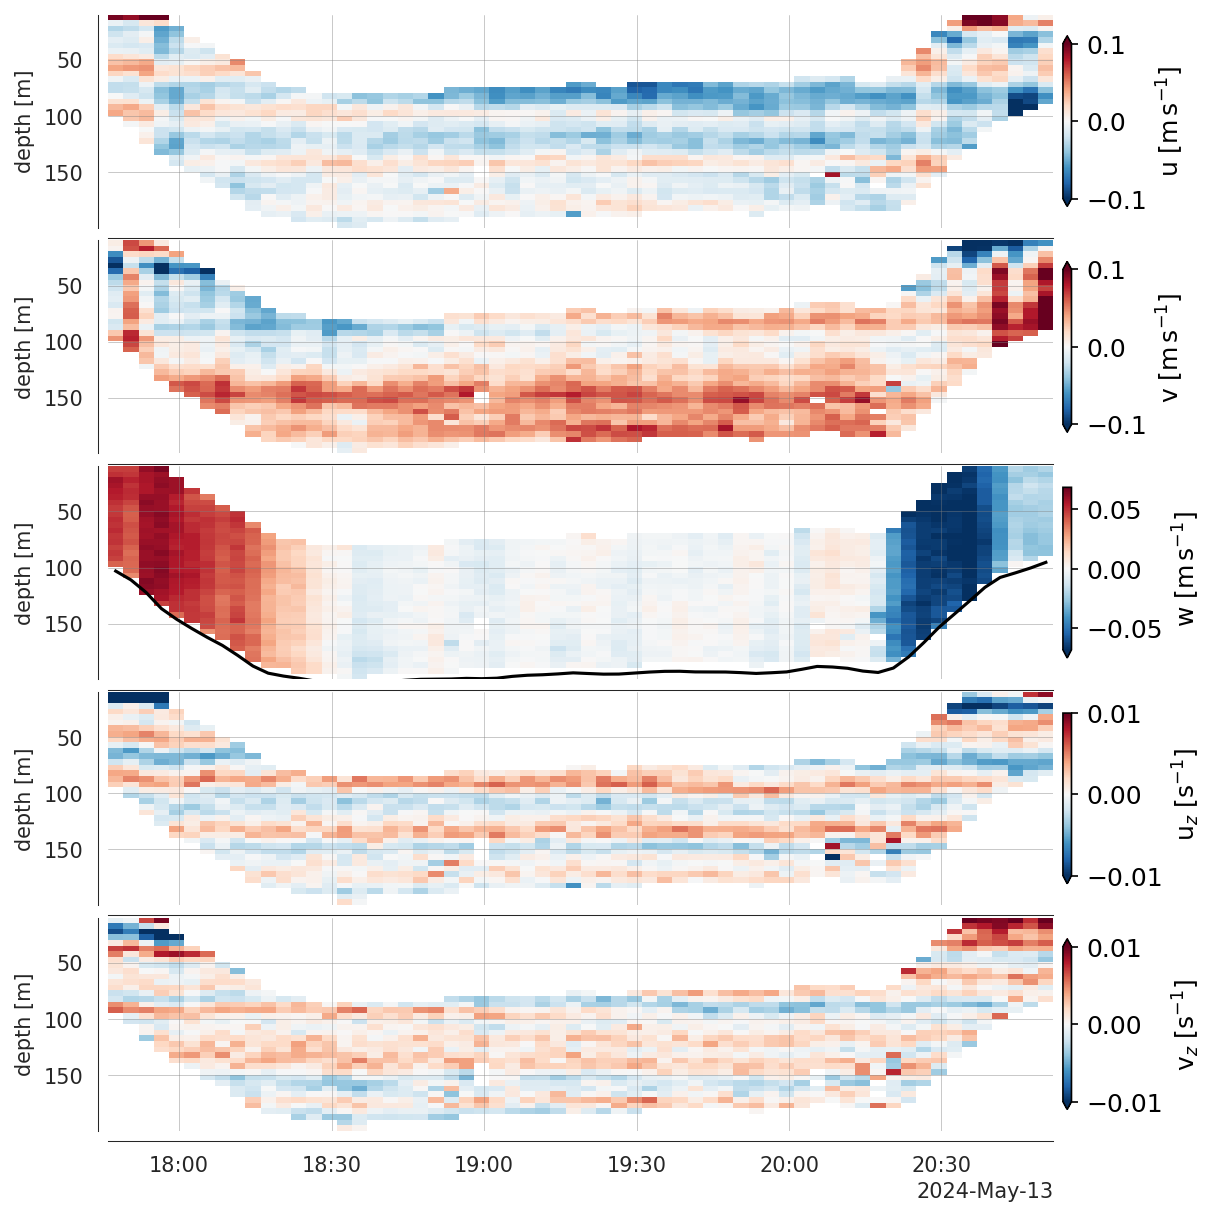

In [14]:
fig, ax = gv.plot.quickfig(r=5, sharex=True, fgs=(8, 8), grid=True)
a.ds.u.gv.plot(cmap="RdBu_r", vmin=-0.1, vmax=0.1, ax=ax[0])
a.ds.v.gv.plot(cmap="RdBu_r", vmin=-0.1, vmax=0.1, ax=ax[1])
a.ds.w.gv.plot(robust=True, ax=ax[2])
a.ds.xducer_depth.gv.plot(ax=ax[2], color="k")
# sbe.p.gv.plot(ax=ax[2], color="0.3", linestyle="--")
ax[2].set(ylabel="depth [m]")

a.ds.u.differentiate("depth").gv.plot(
    cmap="RdBu_r",
    vmin=-0.01,
    vmax=0.01,
    ax=ax[3],
    cbar_kwargs=dict(label="u$_z$ [s$^{-1}$]"),
)
a.ds.v.differentiate("depth").gv.plot(
    cmap="RdBu_r",
    vmin=-0.01,
    vmax=0.01,
    ax=ax[4],
    cbar_kwargs=dict(label="v$_z$ [s$^{-1}$]"),
)
for axi in ax:
    axi.grid()

fig_out = data_path.joinpath(f"adcp/fig/{ncstr_1_day_test}_vel_and_shear")
gv.plot.png(fig_out)

## 2-Day Test

In [3]:
ncstr_2_day_test = "drifter_tchain_2024_05_17_adcp_3160"
raw_file = data_path.joinpath("adcp/raw/03160002.000")

In [4]:
raw = velosearaptor.io.read_raw_rdi(raw_file)

Save raw data to netcdf

In [17]:
raw_out = data_path.joinpath(f"adcp/proc/{ncstr_2_day_test}_raw.nc")
raw.to_netcdf(raw_out, encoding={
    "time": {"units": "seconds since 1970-01-01", "dtype": "float"},
    })

Plot raw data

saving to /Users/gunnar/Projects/nesma/drifter/data/drifter_chain_2024_05/adcp/fig/


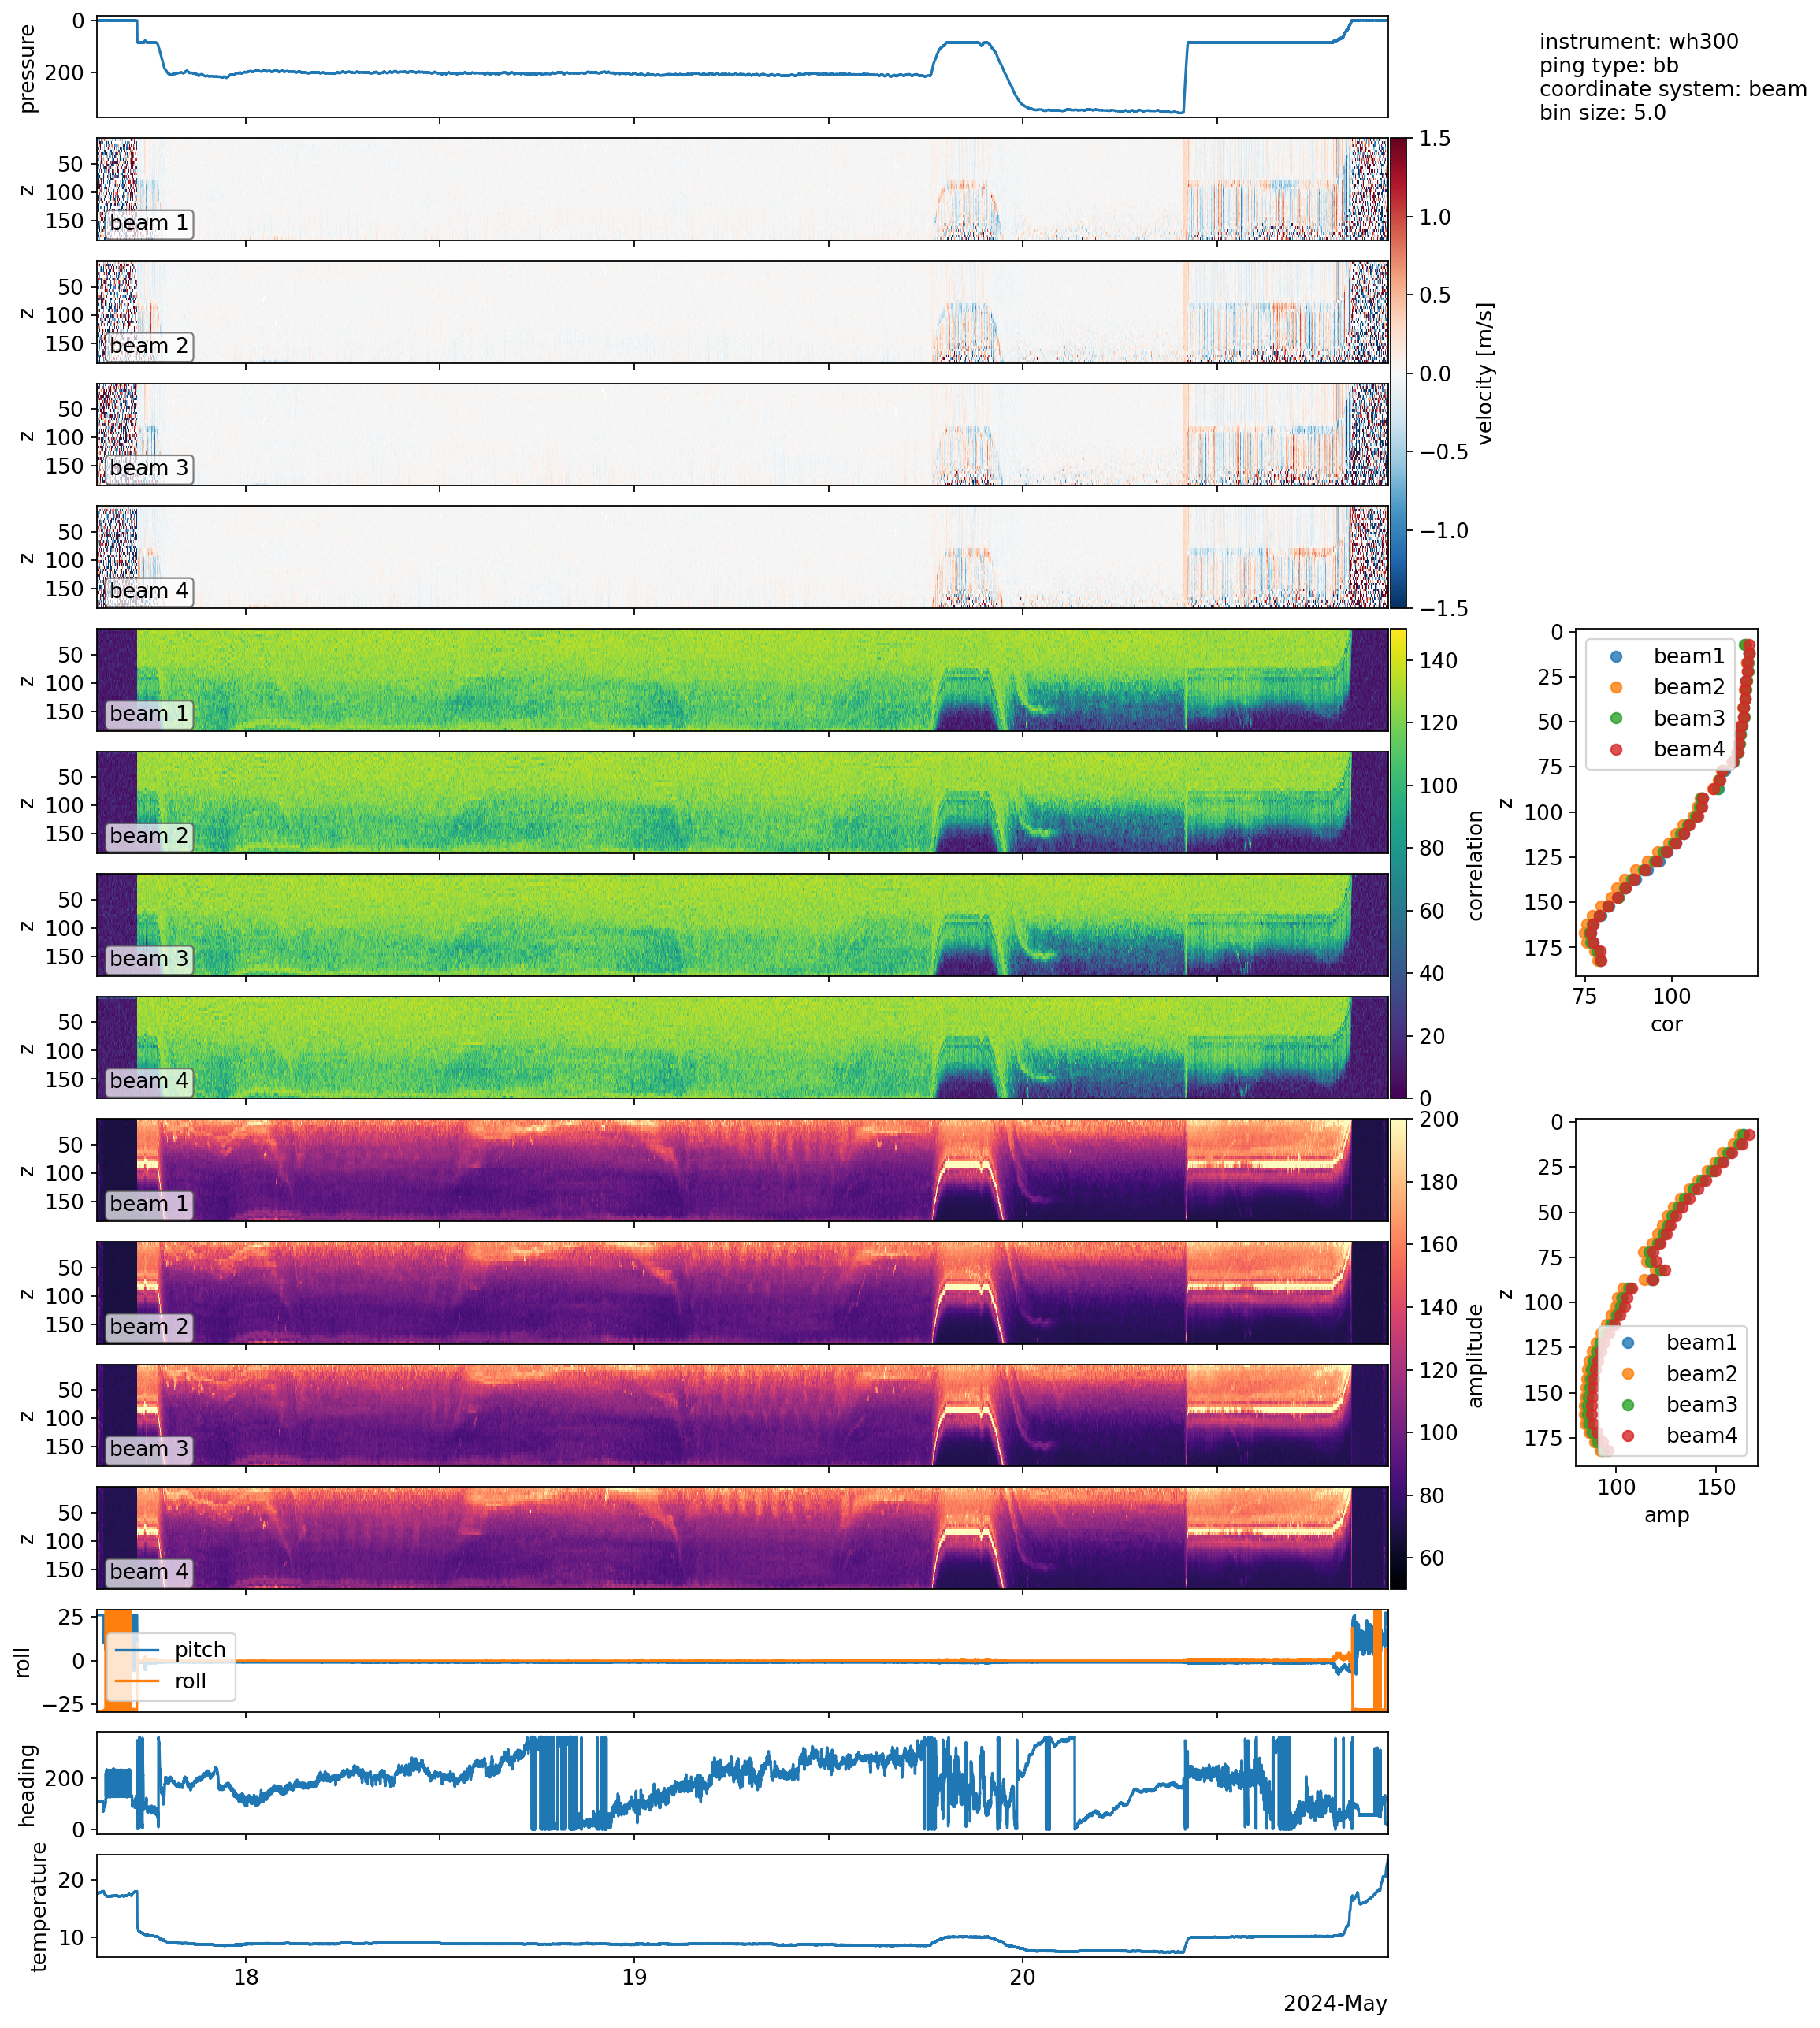

In [18]:
velosearaptor.adcp.plot_raw_adcp(raw)
fig_out = data_path.joinpath(f"adcp/fig/{ncstr_2_day_test}_raw")
gv.plot.png(fig_out)

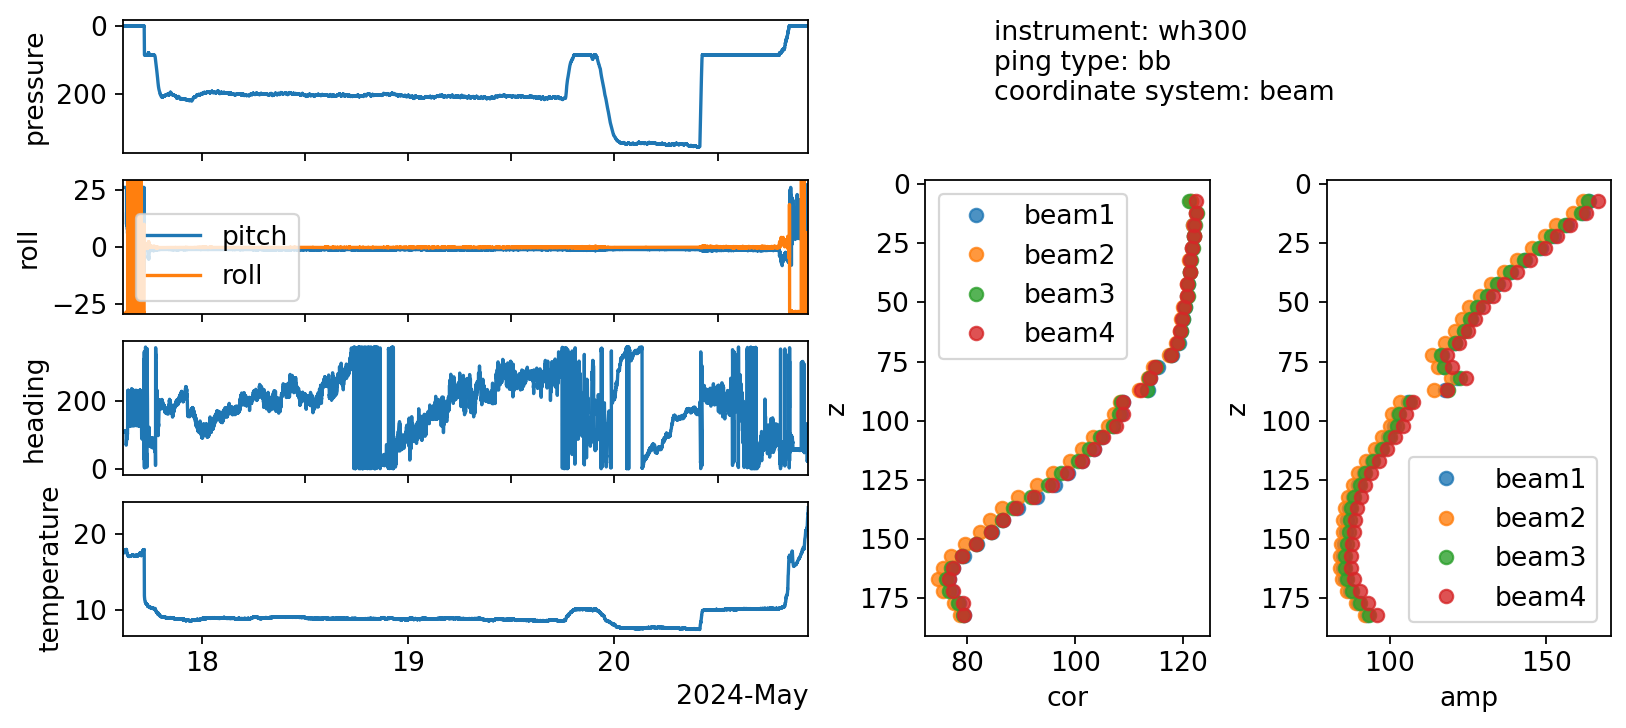

In [19]:
velosearaptor.adcp.plot_raw_adcp_auxillary(raw)

Process raw-data

In [5]:
meta_data = dict(lon=-130, lat=30, mooring=ncstr_2_day_test, sn=3160)
tgridparams = dict(dt_hours=3/60)
a = velosearaptor.madcp.ProcessADCP(raw_file, meta_data=meta_data, tgridparams=tgridparams)

No time drift parameters provided, not applying any clock correction.
No depth gridding parameters provided, using default values.
No edit parameters provided, using default values.


no burst average


Reading raw data...


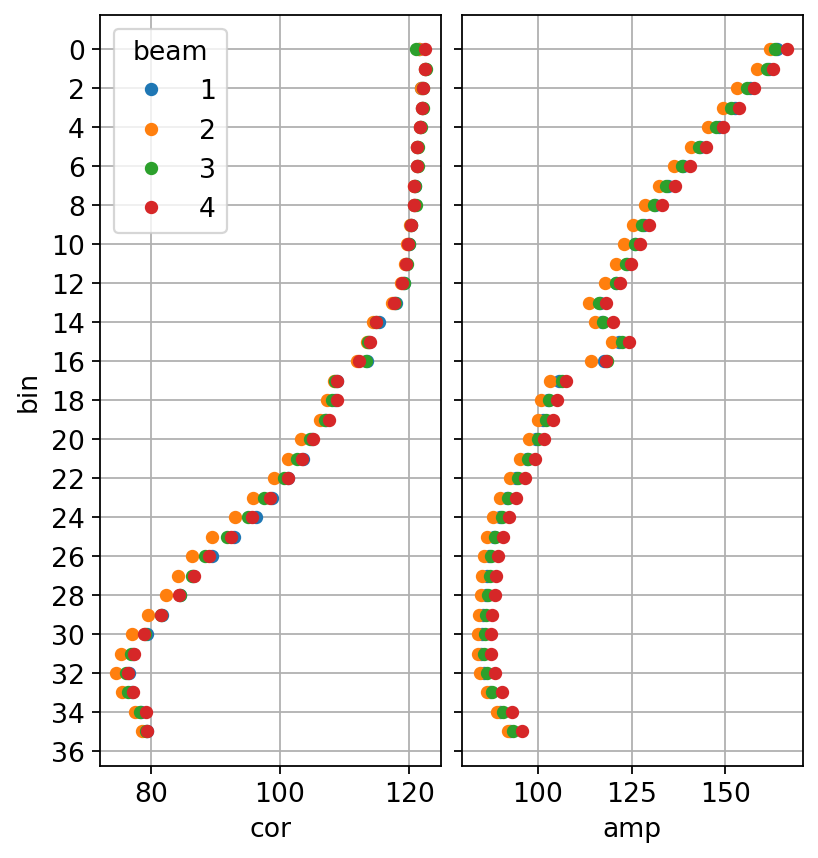

In [6]:
a.plot_echo_stats()

In [8]:
binmask = a.generate_binmask(0)

In [10]:
a.editparams["maskbins"] = binmask

In [11]:
a.average_ensembles()

100%|████████████████████████████████████████████████████████████████████████| 1258/1258 [00:03<00:00, 327.44it/s]


Save to netcdf

In [12]:
proc_out = data_path.joinpath(f"adcp/proc/{ncstr_2_day_test}.nc")
a.ds.to_netcdf(proc_out, encoding={
    "time": {"units": "seconds since 1970-01-01", "dtype": "float"},
    })

PermissionError: [Errno 13] Permission denied: '/Users/gunnar/Projects/nesma/drifter/data/drifter_chain_2024_05/adcp/proc/drifter_tchain_2024_05_17_adcp_3160.nc'

A few plots

<Axes: ylabel='depth [m]'>

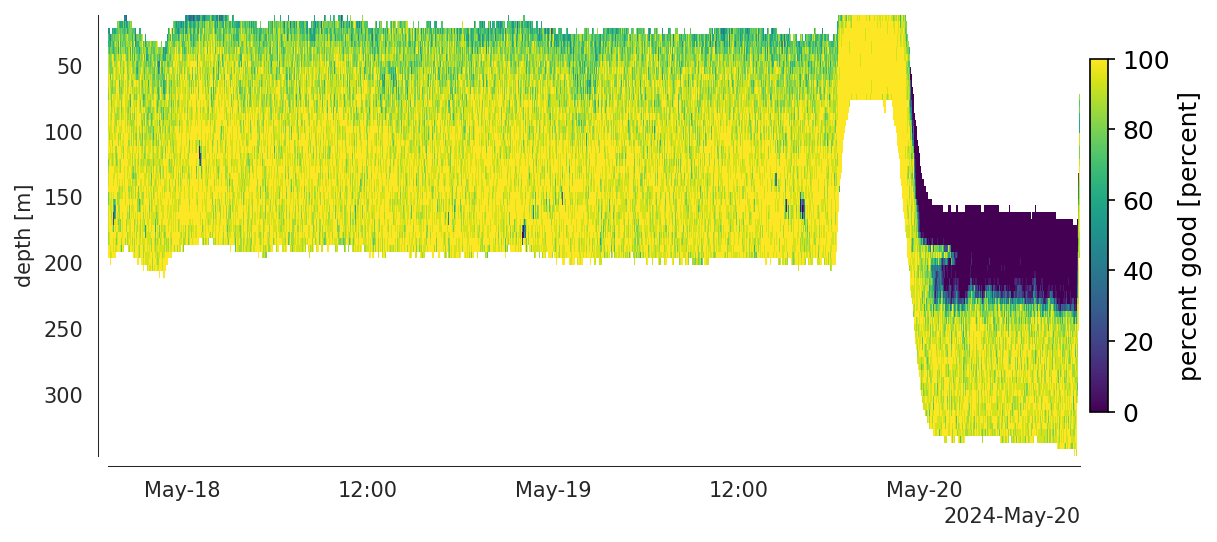

In [24]:
a.ds.pg.gv.plot()

<Axes: ylabel='depth [m]'>

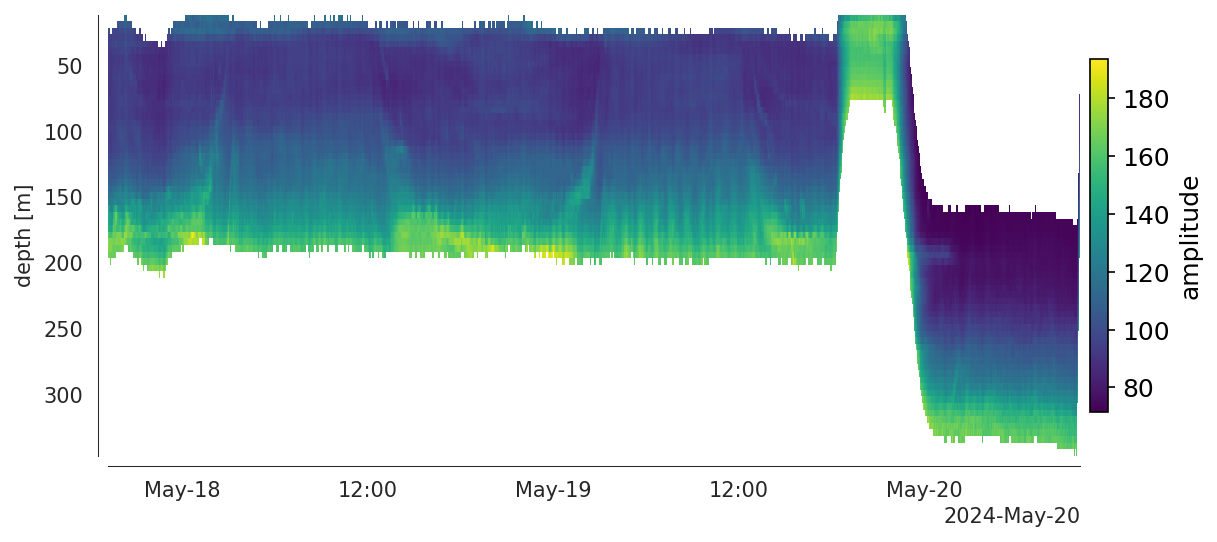

In [25]:
a.ds.amp.gv.plot()

saving to /Users/gunnar/Projects/nesma/drifter/data/drifter_chain_2024_05/adcp/fig/


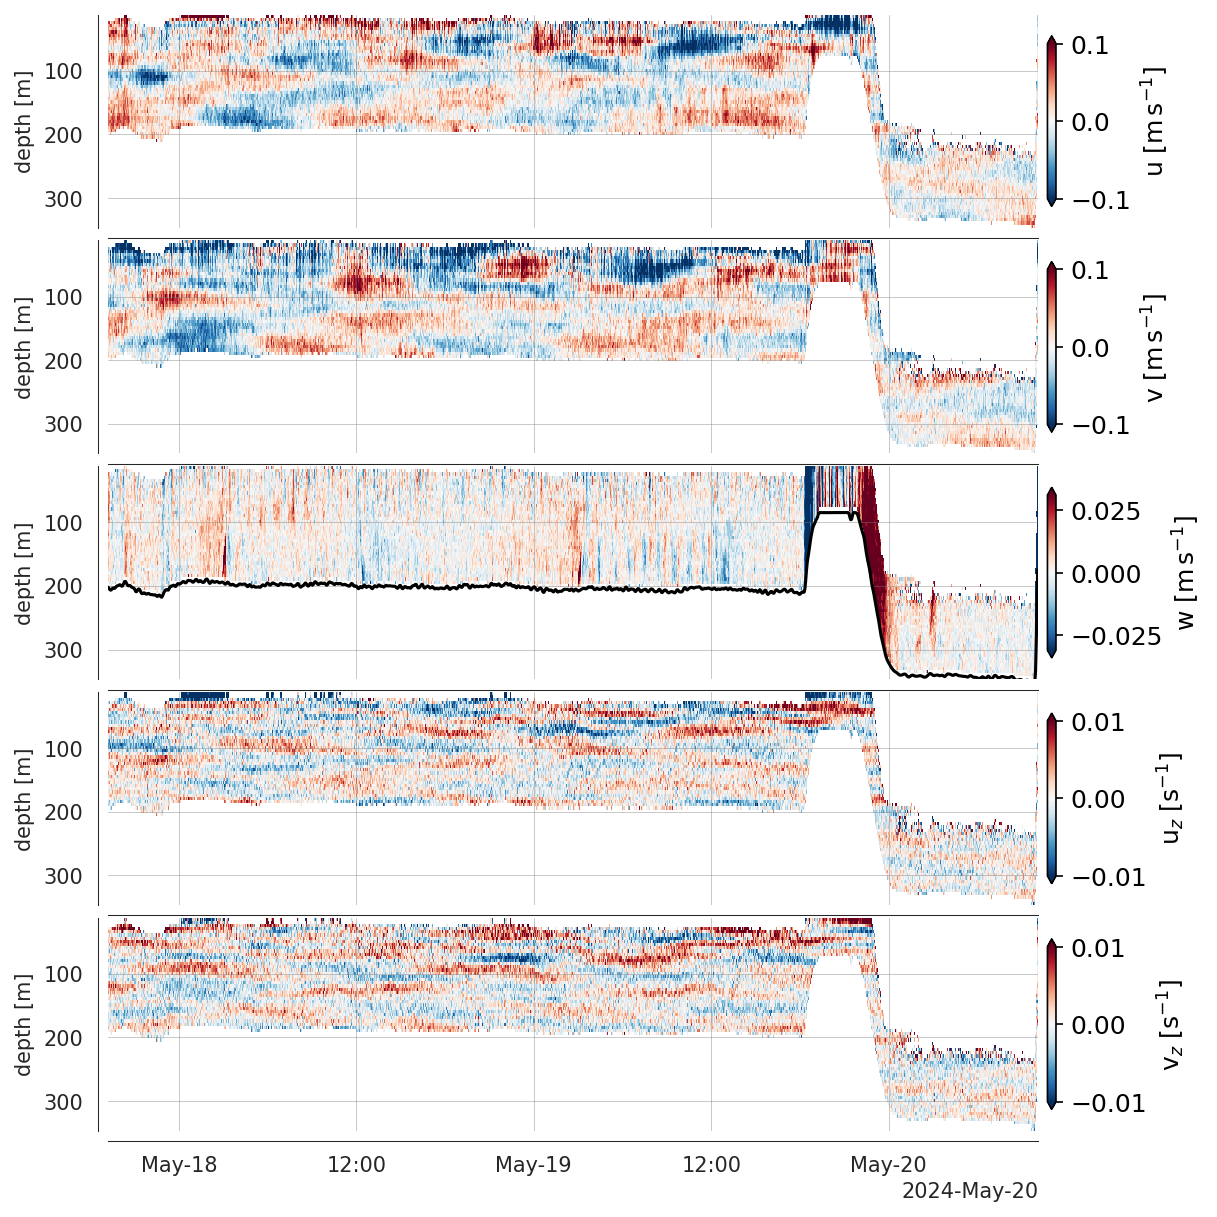

In [26]:
fig, ax = gv.plot.quickfig(r=5, sharex=True, fgs=(8, 8), grid=True)
a.ds.u.gv.plot(cmap="RdBu_r", vmin=-0.1, vmax=0.1, ax=ax[0])
a.ds.v.gv.plot(cmap="RdBu_r", vmin=-0.1, vmax=0.1, ax=ax[1])
a.ds.w.gv.plot(robust=True, ax=ax[2])
a.ds.xducer_depth.gv.plot(ax=ax[2], color="k")
# sbe.p.gv.plot(ax=ax[2], color="0.3", linestyle="--")
ax[2].set(ylabel="depth [m]")

a.ds.u.differentiate("depth").gv.plot(
    cmap="RdBu_r",
    vmin=-0.01,
    vmax=0.01,
    ax=ax[3],
    cbar_kwargs=dict(label="u$_z$ [s$^{-1}$]"),
)
a.ds.v.differentiate("depth").gv.plot(
    cmap="RdBu_r",
    vmin=-0.01,
    vmax=0.01,
    ax=ax[4],
    cbar_kwargs=dict(label="v$_z$ [s$^{-1}$]"),
)
for axi in ax:
    axi.grid()

fig_out = data_path.joinpath(f"adcp/fig/{ncstr_2_day_test}_vel_and_shear")
gv.plot.png(fig_out)

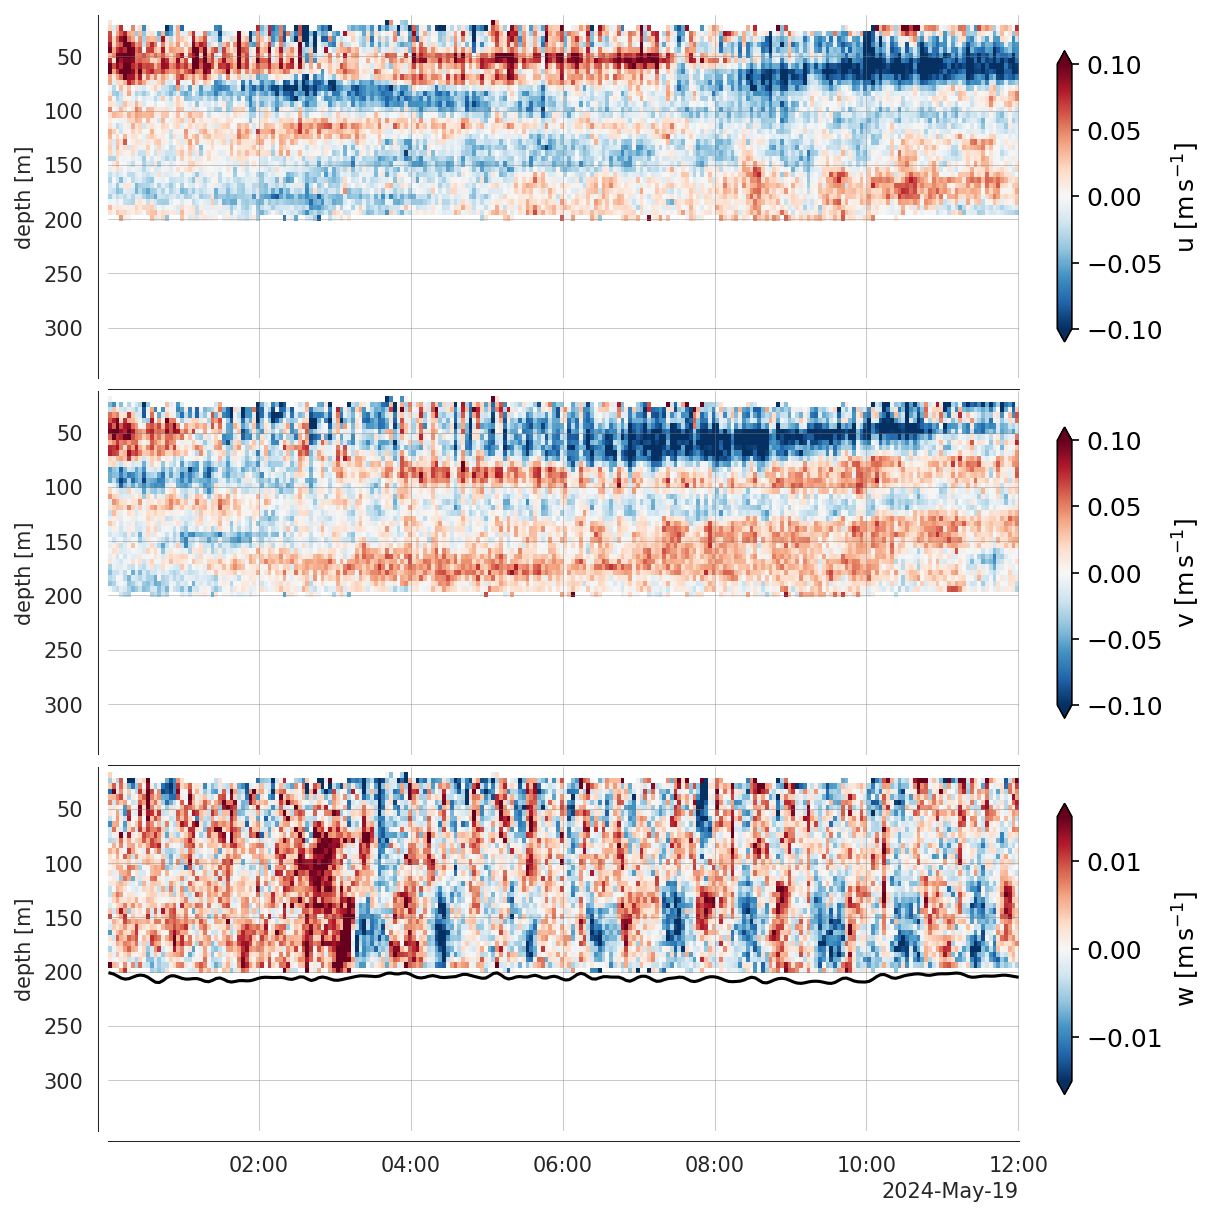

In [27]:
tmp = a.ds.sel(time=slice("2024-05-19 00:00", "2024-05-19 12:00"))
fig, ax = gv.plot.quickfig(r=3, sharex=True, fgs=(8, 8), grid=True)
tmp.u.gv.plot(cmap="RdBu_r", vmin=-0.1, vmax=0.1, ax=ax[0])
tmp.v.gv.plot(cmap="RdBu_r", vmin=-0.1, vmax=0.1, ax=ax[1])
tmp.w.gv.plot(robust=True, ax=ax[2])
tmp.xducer_depth.gv.plot(ax=ax[2], color="k")
# sbe.p.gv.plot(ax=ax[2], color="0.3", linestyle="--")
ax[2].set(ylabel="depth [m]")

for axi in ax:
    axi.grid()

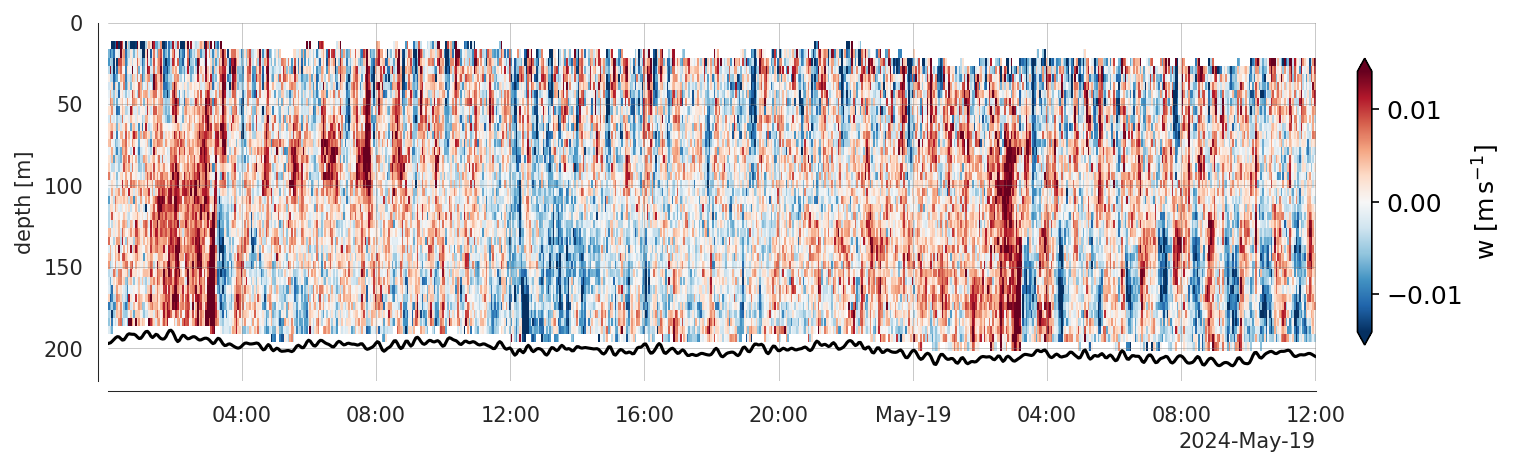

In [28]:
tmp = a.ds.sel(time=slice("2024-05-18 00:00", "2024-05-19 12:00"))
fig, ax = gv.plot.quickfig(r=1, sharex=True, fgs=(10, 3), grid=True)
tmp.w.gv.plot(robust=True, ax=ax)
tmp.xducer_depth.gv.plot(ax=ax, color="k")
ax.set(ylabel="depth [m]", ylim=(220, 0))
ax.grid()

Zoom into first drift

In [14]:
mask = (a.ds.pressure > 180) & (a.ds.time < np.datetime64("2024-05-19 20:00"))

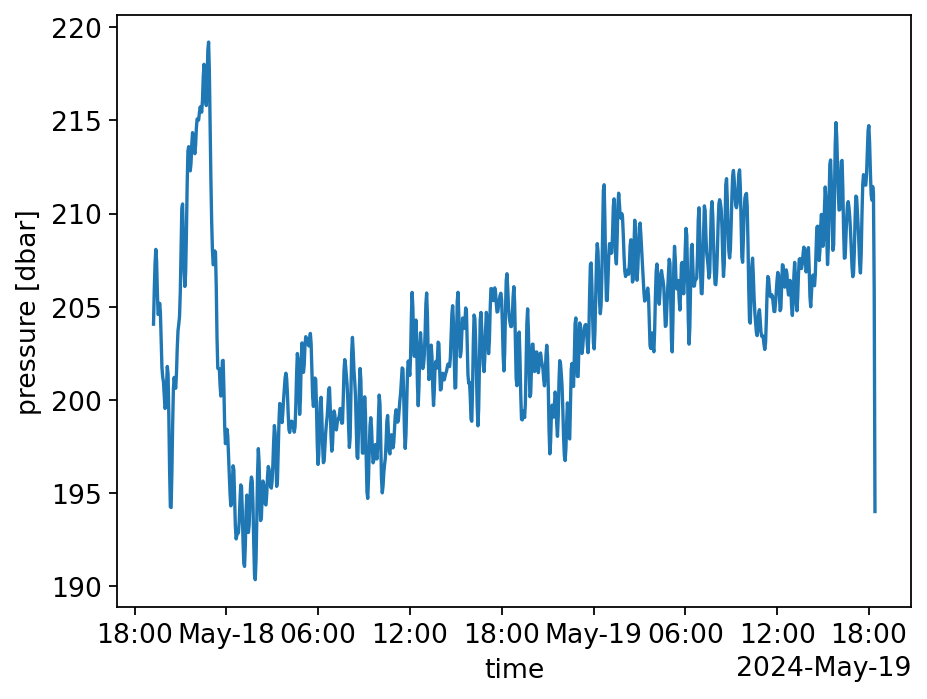

In [15]:
a.ds.pressure[mask].plot()

In [40]:
aa = a.ds.sel(time=mask)
# aa = aa.where(aa.pg>50)
# aa = aa.dropna(dim="depth", how="all")
aa = aa.dropna(dim="depth")

<Axes: ylabel='depth [m]'>

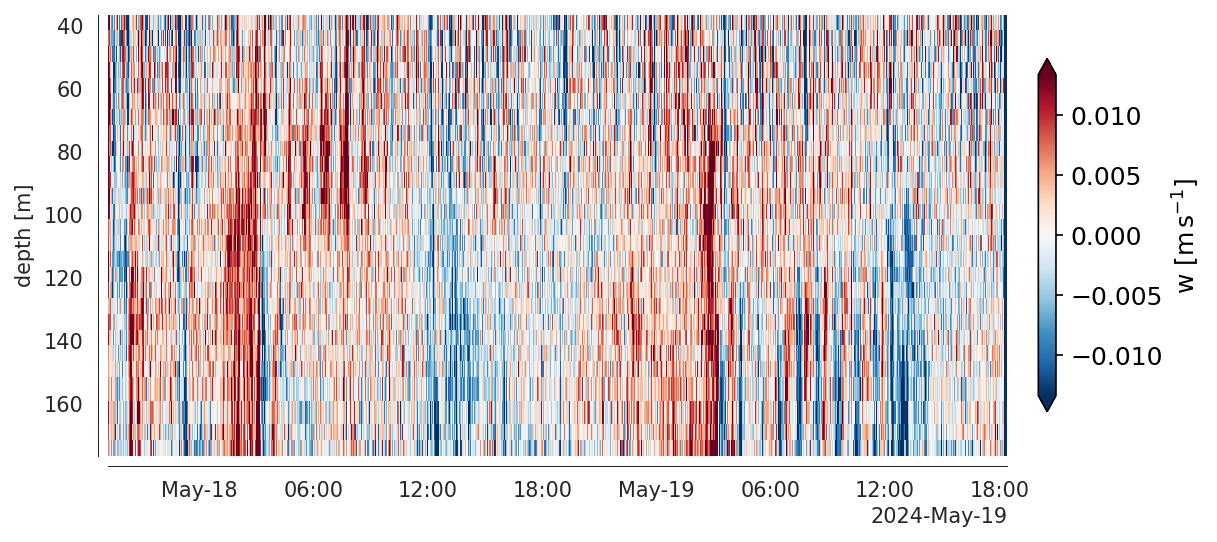

In [41]:
aa.w.gv.plot(robust=True)

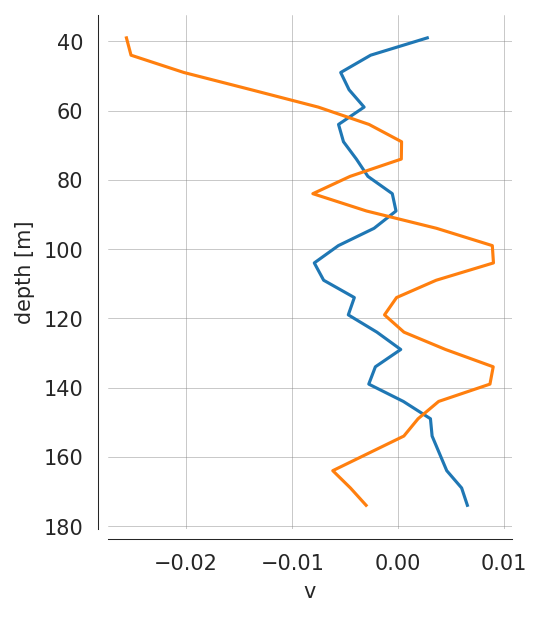

In [42]:
ax = aa.u.mean("time").gv.plot()
ax = aa.v.mean("time").gv.plot(ax=ax)

<Axes: ylabel='depth [m]'>

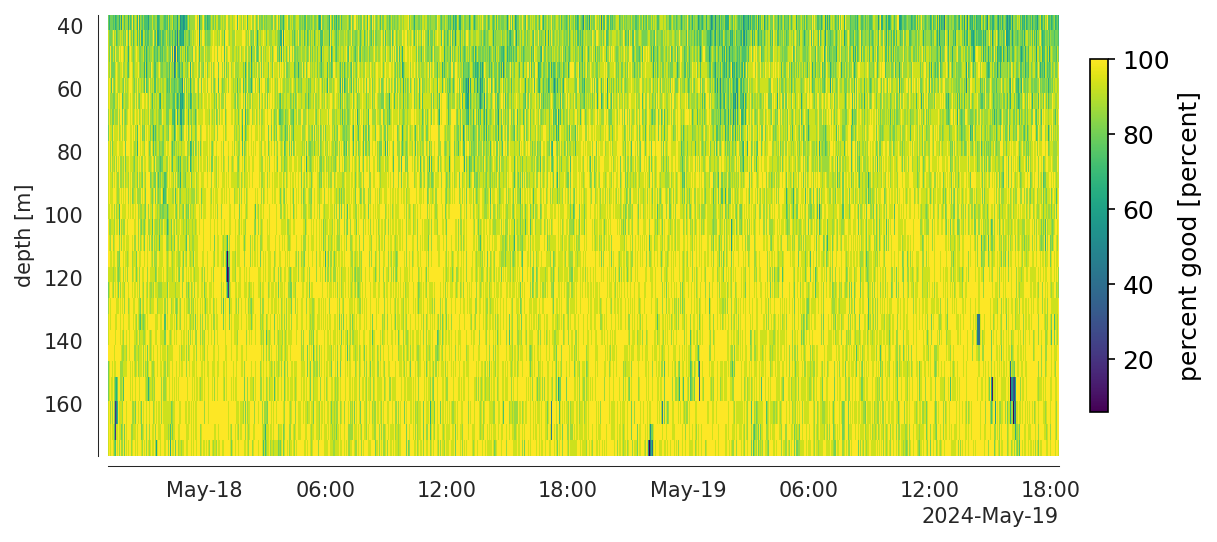

In [43]:
aa.pg.gv.plot()